In [80]:
import netCDF4 as nc
import numpy as np
import pandas as pd

# Monthly Soil moisture (mm3/mm3) of California from 2017-2018 (24 months)

In [81]:
soil_moisture = []
for month in range(1, 10):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20170"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(10, 13):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2017"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(1, 10):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20180"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for month in range(10, 13):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2018"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for index, data in enumerate(soil_moisture):
    if(data == 0):
        data = (soil_moisture[index-1] + soil_moisture[index+1])/2
        soil_moisture[index] = data
print(soil_moisture)

[0.24582867, 0.26577717, 0.26728067, 0.26728737, 0.24231267, 0.146871, 0.14026248, 0.12776254, 0.11213975, 0.15040728, 0.15875389, 0.24747427, 0.21590715646743774, 0.23874135, 0.23361720144748688, 0.22849305, 0.21192941, 0.19964428, 0.101666465, 0.1041939, 0.09674478, 0.1386405, 0.21872484564420347, 0.22324495]


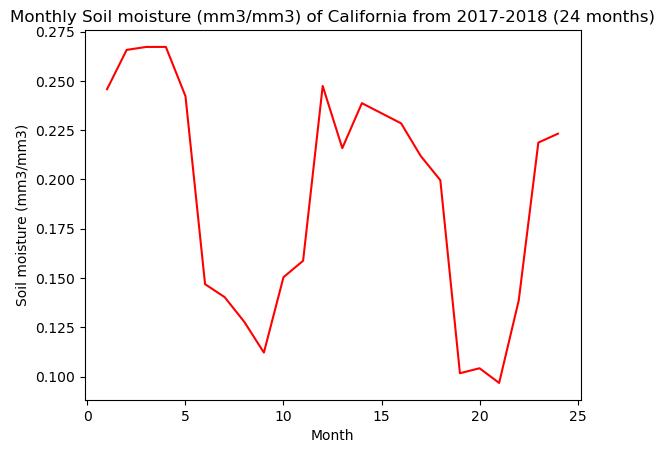

In [82]:
import matplotlib.pyplot as plt
month = np.arange(1, 25, 1)
plt.title("Monthly Soil moisture (mm3/mm3) of California from 2017-2018 (24 months)")
plt.xlabel("Month")
plt.ylabel("Soil moisture (mm3/mm3)")
plt.plot(month, soil_moisture, 'r')

In [89]:
air_pressure_california = pd.DataFrame(pd.read_csv("/Users/silent/Documents/MCM_works/Competition/Data/California_data/AirPressure.csv"))
air_pressure_list = air_pressure_california.values[0].tolist() + air_pressure_california.values[1].tolist()
rainfall_california = pd.DataFrame(pd.read_csv("/Users/silent/Documents/MCM_works/Competition/Data/California_data/ObservedRainfall.csv"))
rainfall_list = rainfall_california.values[0].tolist() + rainfall_california.values[1].tolist()
temperature_california = pd.DataFrame(pd.read_csv("/Users/silent/Documents/MCM_works/Competition/Data/California_data/Temperature.csv"))
temperature_list = temperature_california.values[0].tolist() + temperature_california.values[1].tolist()
print(rainfall_list)

[11.26233333, 10.1072, 2.663870968, 2.152903226, 0.683225806, 0.227857143, 0.050322581, 0.101, 0.305483871, 0.413448276, 2.280322581, 0.424827586, 4.361290323, 0.760967742, 6.133225806, 1.707096774, 0.250645161, 0.089666667, 0.053793103, 0.008666667, 0.051, 0.633448276, 3.228666667, 3.093448276]


/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_16147/2414230441.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_16147/2414230441.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")


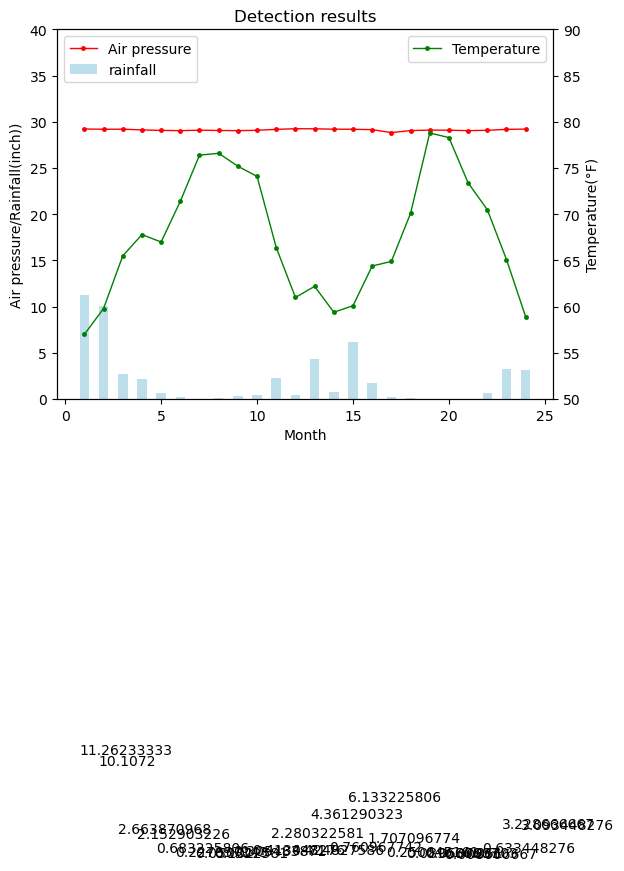

In [114]:
# 绘柱状图
plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
figure = plt.bar(x=month, height=rainfall_list, label='rainfall', color='lightblue', alpha=0.8, width=0.5)
plt.ylim(0, 40)
# 在左侧显示图例
plt.legend(loc="upper left")
# 设置标题
plt.title("Detection results")
# 为两条坐标轴设置名称
plt.xlabel("Month")
plt.ylabel("Air pressure/Rainfall(inch))")

# 画折线图
ax2 = plt.twinx()
ax2.set_ylabel("Temperature(°F)")
ax2.set_ylim(50, 90)
# 设置坐标轴范围
plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")
# 显示数字

for fig in figure:
    ax2.text(fig.get_x(), fig.get_height(), fig.get_height(), ha='left', va='bottom')
    plt.legend(loc="upper right")
plt.show()
 